In [1]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, noisyDefecitRestoration, utopianRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [20]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
SCALED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_scaled.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
UTOPIAN_FLOW_DIFF_PATH = os.path.join(DATA_PATH, "smol/grad_diff.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=0.98)

In [3]:
def disp(region, title=None):
    """
    Display the region.
    """
    if (len(region.shape) == 3):
        region = np.squeeze(region)
    r = region
    if isinstance(r, torch.Tensor):
        r = r.cpu().detach().numpy()
    fig, ax = plt.subplots()
    fig.colorbar(ax.imshow(r, cmap="inferno", vmin=0))
    if title:
        plt.title(title)
    plt.show()

In [4]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()

permiability_restored = utopianOptimizer.restore(verbose=True)
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036, 201: 0.033518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.098744526, 308: 1.0, 400: 0.0, 401: 0.001868613, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.001693431, 502: 0.000175182, 505: 0.045255474, 506: 0.001284672, 507: 0.0, 510: 0.0, 511: 0.001226277, 513: 0.000817518, 514: 0.0, 515: 0.0, 600: 0.00070073, 801: 0.000817518, 802: 0.000350365, 803: 0.000583942, 900: 0.014540146, 909: 0.006014599, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.000934307, 1206: 0.0, 1401: 0.2715912408759124, 1402: 0.9, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(181, 161): 53, (141, 177): 52, (182, 162): 52, (230, 28): 51, (149, 157): 50, (288, 41): 50, (146, 165): 49, (62, 129): 49, (19, 4): 49, (61, 130): 49, (117, 168): 49, (179, 161): 48, (142, 177): 48, (134, 172): 48, (177, 144): 48, (227, 10): 48, (224, 10): 48, (142, 175): 47, (153, 158): 47, (16, 116): 47, (228, 11): 47, (224, 11): 47, (226, 10): 47, (20, 110): 47, (152, 160): 47, (290, 39): 47, (291, 39): 47, (142, 188): 47, (256, 22): 47, (60, 129): 47, (226, 11): 46, (142, 189): 46, (23, 119): 46, (261, 30): 46, (11, 116): 46, (167, 151): 46, (146, 164): 46, (153, 161): 46, (182, 190): 46, (9, 116): 46, (151, 158): 46, (175, 155): 46, (130, 157): 46, (18, 114): 46, (227, 11): 46, (223, 11): 46, (58, 130): 46}
Restoring pixel (181, 161) from permiability 0.2715912408759124 to 1.0
Restoring pixel (141, 177) from permiability 0.0 to 1.0
Restoring pixel (182, 162) from permiability 0.0 to 1.0
Restoring pixel (230, 28) from permiability 0.001868613 to 1.0
Restoring pixel (149, 157) fr

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 2194
Permiability Restored: 39.62020438015329
Percent connectivity changed: 0.0006679683016464475%
Connectivity/permiability_restored: 55.3757870340272


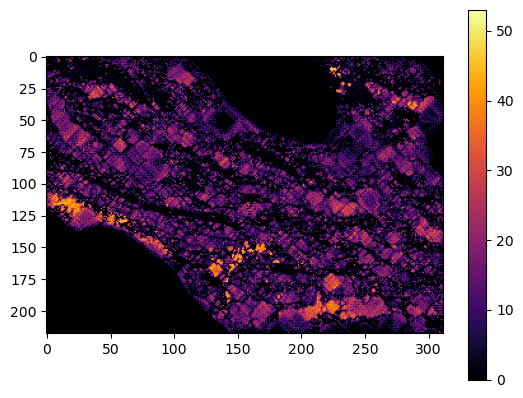

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

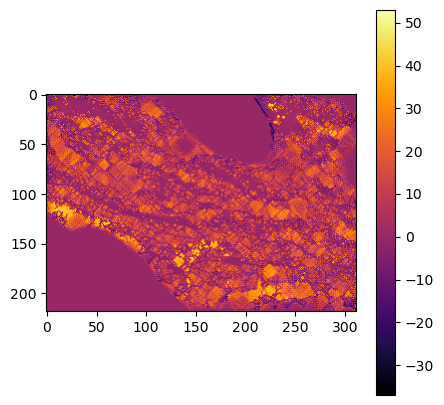

In [5]:
diff = utopianOptimizer.get_flow_diff()
disp(diff)
utopianOptimizer.draw_flow_diff_tif(UTOPIAN_FLOW_DIFF_PATH)
with GeoTiff.from_file(UTOPIAN_FLOW_DIFF_PATH) as diff:
    diff.draw_geotiff()

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


<Figure size 500x500 with 0 Axes>

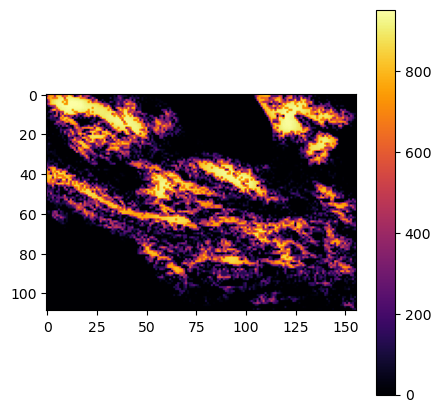

In [55]:
import math
import scgt

def lower_res_matrix(matrix, rows=None, cols=None, rscale=None, cscale=None):
    r, c = matrix.shape
    if rscale and cscale:
        return matrix.reshape(r//rscale, rscale, c//cscale, cscale).sum(axis=1).sum(axis=2)

    if rows and cols:
        return matrix.reshape(rows, matrix.shape[0]//rows, cols, matrix.shape[1]//cols).sum(axis=1).sum(axis=2)

'''
Scales the geotiff data in tif_fn to resolution constituting of n pixels, writing scaled tif to scaled_tif_fn
e.g. if n=9, we want 3x3 squares
param row_pixels: number of pixels to combine to 1 pixel on y axis (divisible by tif_fn's height)
param col_pixels: number of pixels to combine to 1 pixel on x axis (divisible by tif_fn's width)
'''
def scale_geotiff(tif_fn, scaled_tif_fn, row_pixels, col_pixels):
    with GeoTiff.from_file(tif_fn) as tif:
        mat = tif.get_all_as_tile().m.squeeze(0)
        scaled_mat = lower_res_matrix(mat, rscale=row_pixels, cscale=col_pixels)
        scaled_tile = Tile(scaled_mat.shape[1], scaled_mat.shape[0], 0, 1, 0, 0, np.expand_dims(scaled_mat, 0))
        profile = tif.profile
        profile['width'] = scaled_mat.shape[1]
        profile['height'] = scaled_mat.shape[0]
        with tif.copy_to_new_file(scaled_tif_fn, profile) as scaled_tif:
            scaled_tif.set_tile(scaled_tile)

# with GeoTiff.from_file(CONNECTIVITY_PATH) as conn:
#     conn_mat = conn.get_all_as_tile().m.squeeze(0)
#     disp(conn_mat)
#     print(conn.profile)
# print(conn_mat.shape)
# conn_mat_low_res1 = lower_res_matrix(conn_mat, 109, 156)
# conn_mat_low_res2 = lower_res_matrix(conn_mat, rscale=2, cscale=4)
# disp(conn_mat_low_res1)
# disp(conn_mat_low_res2)
# print(np.all(conn_mat_low_res1 == conn_mat_low_res2))

scale_geotiff(CONNECTIVITY_PATH, SCALED_CONNECTIVITY_PATH, row_pixels=2, col_pixels=2)
with GeoTiff.from_file(SCALED_CONNECTIVITY_PATH) as scaled_conn:
    scaled_conn.draw_geotiff()

With permiability 0.98,
sum of 

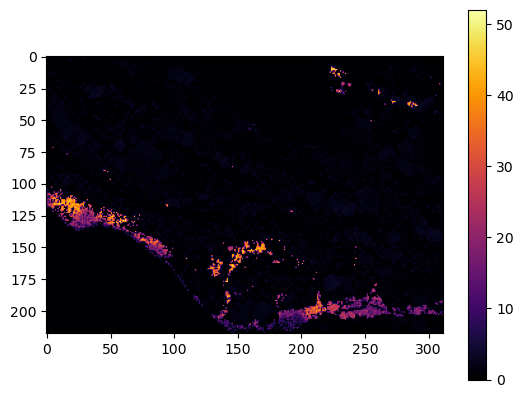

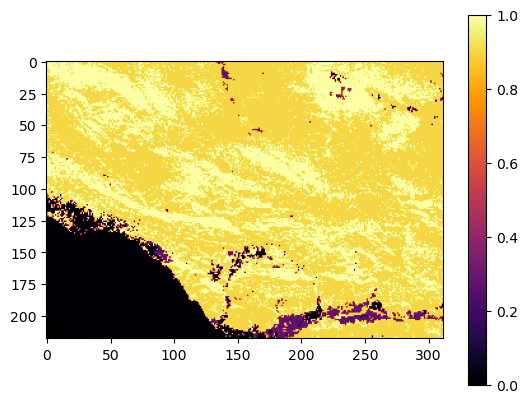

In [6]:
diff = utopianOptimizer.get_flow_diff_weighted_by_permiability()
disp(diff)

permiability = utopianOptimizer.get_permiability_matrix()
disp(permiability)

In [4]:
# utopian restoration
# utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()

permiability_restored = utopianOptimizer.restore(verbose=True, weighted=True)
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {utopianOptimizer.get_delta_connectivity()}")
print(f"Permiability Restored: {permiability_restored}")
print(f"Percent connectivity changed: {utopianOptimizer.get_connectivity_percent_changed()}%")
print(f"Connectivity/permiability_restored: {utopianOptimizer.get_delta_connectivity()/permiability_restored}")

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(182, 162): 52.0, (141, 177): 52.0, (230, 28): 50.99982192255827, (149, 157): 50.0, (181, 161): 49.09062448761255, (146, 165): 49.0, (62, 129): 49.0, (177, 144): 48.0, (142, 177): 48.0, (224, 10): 48.0, (134, 172): 47.95227261974532, (224, 11): 47.0, (20, 110): 47.0, (60, 129): 47.0, (290, 39): 47.0, (226, 10): 47.0, (228, 11): 47.0, (142, 175): 47.0, (152, 160): 47.0, (291, 39): 47.0, (16, 116): 47.0, (18, 114): 46.0, (11, 116): 46.0, (142, 189): 46.0, (151, 158): 46.0, (226, 11): 46.0, (261, 30): 46.0, (152, 161): 46.0, (146, 164): 46.0, (167, 151): 46.0, (58, 130): 46.0, (175, 155): 46.0, (9, 116): 46.0, (23, 119): 46.0, (227, 11): 46.0, (130, 157): 45.90578933535962, (117, 168): 45.385671696094626, (61, 130): 45.385671696094626, (60, 130): 45.0, (52, 126): 45.0, (162, 153): 45.0, (57, 126): 45.0, (43, 126): 45.0, (58, 125): 45.0, (285, 39): 45.0, (155, 153): 45.0, (160, 153): 45.0, (24, 117): 45.0, (56, 129): 45.0, (12, 116): 45.0}
Restoring pixel (182, 162) from permiability 0.0 

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 2685
Permiability Restored: 49.10656934365693
Percent connectivity changed: 0.0008174543709757117%
Connectivity/permiability_restored: 54.67700219923468
